# Assignment 2 - image Processing

## Names :
##                - وليد عماد الدين عزت    43920
##                - 43928    يوسف محمد محمود محمد 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

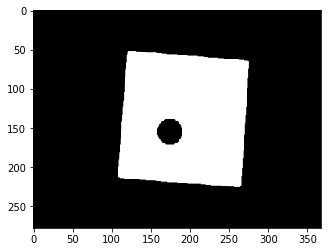

In [2]:
# image read and show
img = cv2.imread('Square-circle.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

## Task 1

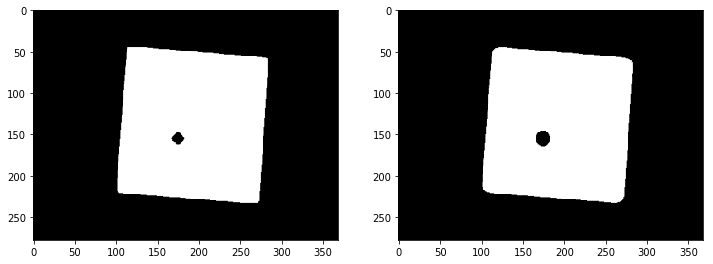

In [3]:
# getting the structuring element
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
circleSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
# 1- Dilation with square SE
squareDil = cv2.dilate(img,squareSE,iterations = 1)
circleDil = cv2.dilate(img,circleSE,iterations = 1)
# plotting output side by side 
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(squareDil,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(circleDil,cv2.COLOR_BGR2RGB))
plt.show()

# Observation:-
## - In the resultant image the white square became bigger and the black circle became smaller with both SEs.
### - in the first output (using square SE) the edges are more sharp and square shaped due to the square SE.
### - in the second output (using circle SE) the edges are round due to the circular SE.

## Task 2

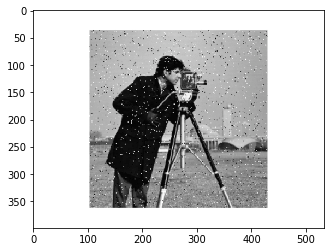

In [4]:
# Reading the new image
img = cv2.imread('Cameraman.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

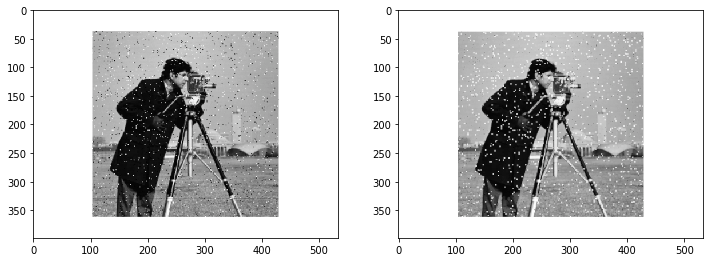

In [5]:
# Getting the structuring element
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
# Dilating
cameramanDenoised = cv2.dilate(img,squareSE,iterations = 1)
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(cameramanDenoised,cv2.COLOR_BGR2RGB))
plt.show()

## - The task was to remove pepper noise only, so salt noise still exist

## Task 3

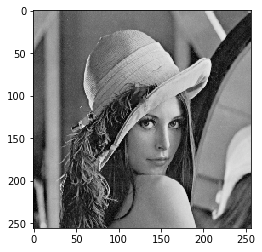

In [6]:
# Reading the new image
img = cv2.imread('lady.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

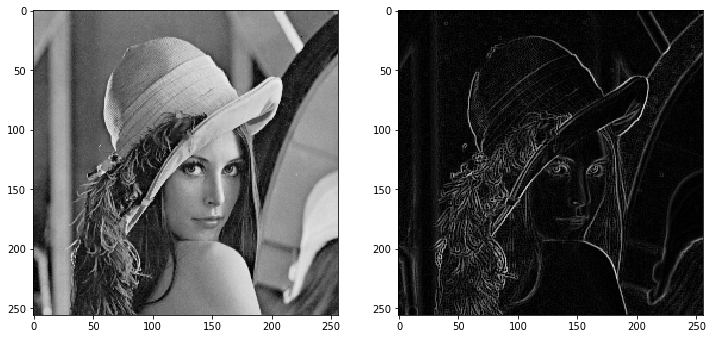

In [7]:
# Getting SE
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# Dilating
ladyDilated = cv2.dilate(img,squareSE,iterations = 1)
ladyEdge = ladyDilated - img
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(ladyEdge,cv2.COLOR_BGR2RGB))
plt.show()

## Task 4

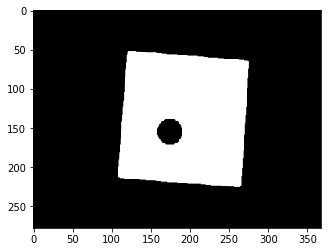

In [8]:
img = cv2.imread('Square-circle.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


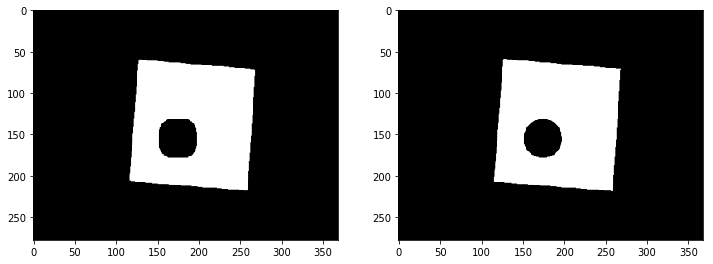

In [9]:
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
circleSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
# 1- Dilation with square SE
squareER = cv2.erode(img,squareSE,iterations = 1)
circleER = cv2.erode(img,circleSE,iterations = 1)
# plotting output side by side 
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(squareER,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(circleER,cv2.COLOR_BGR2RGB))
plt.show()

# Observation:-
## - In the resultant image the white square became smaller and the black circle became bigger with both SEs.
### - in the first output (using square SE) the sides if the inner circle are straightened a bit due to square SE.
### - in the second output (using circle SE) the sides of the circle are round due to the circle SE.

## Task 5

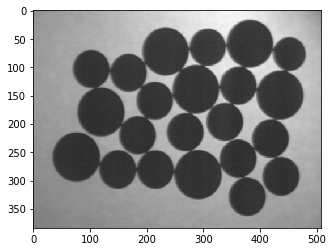

In [10]:
img = cv2.imread('Circle.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

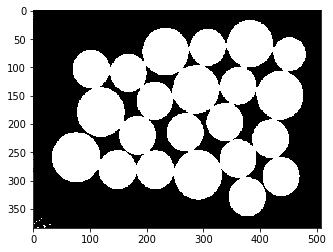

In [11]:
# inverse binary thresholding
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(thresh2,cv2.COLOR_BGR2RGB))
plt.show()

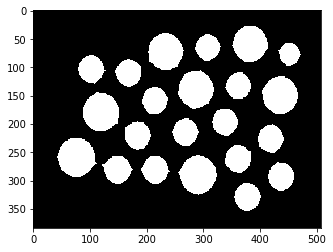

In [12]:
# Eroding with circle 20x20 SE
circleSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
circle_erode = cv2.erode(thresh2,circleSE,iterations = 1)
plt.imshow(cv2.cvtColor(circle_erode,cv2.COLOR_BGR2RGB))
plt.show()

## not sure if the youy want circles instead of disks ... the output would be as follows.

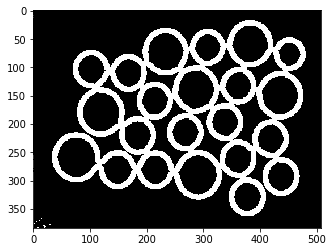

In [14]:
circles_2 = thresh2 - circle_erode
plt.imshow(cv2.cvtColor(circles_2,cv2.COLOR_BGR2RGB))
plt.show()

## Task 6

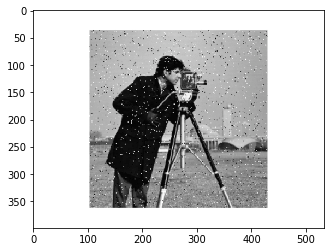

In [15]:
# Reading the new image
img = cv2.imread('Cameraman.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

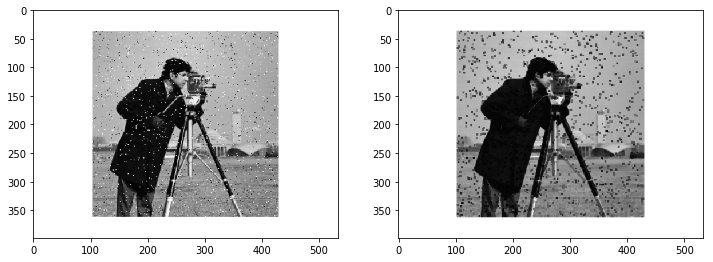

In [16]:
### Getting the structuring element
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# Dilating
cameraman_salt_denoise = cv2.erode(img,squareSE,iterations = 1)
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(cameraman_salt_denoise,cv2.COLOR_BGR2RGB))
plt.show()

## here also only salt noise is cleared with (erosion) and that is why pepper noise and all black objects in the img became bigger

## Task 7 a

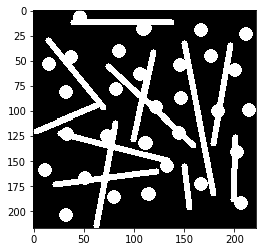

In [17]:
# Reading the new image
img = cv2.imread('Circle_and_lines.png',1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# custom kernel for inclined lines
squareSE_135 = np.asarray([
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    ,dtype = np.uint8)

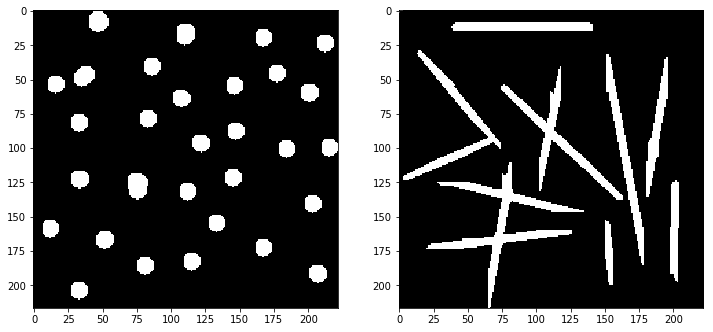

In [38]:
# SE
squareSE_V = cv2.getStructuringElement(cv2.MORPH_RECT,(1,24))
squareSE_H = cv2.getStructuringElement(cv2.MORPH_RECT,(24,1))
squareSE_45 = np.eye(24,dtype = np.uint8)
circleSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))
# opening with circle SE
circles = cv2.morphologyEx(img,cv2.MORPH_OPEN,circleSE)
# adding 0 boarder to avoid errors on the edge
shape=img.shape
w=shape[1]
h=shape[0]
test = img.copy()
cv2.rectangle(test,(0,0),(w,h),(0,0,0),2)
#morphological operatoins ( different lines open)
linesOpen45 = cv2.morphologyEx(test,cv2.MORPH_OPEN,squareSE_45)
linesOpen135 = cv2.morphologyEx(test,cv2.MORPH_OPEN,squareSE_135)
linesOpenV = cv2.morphologyEx(test,cv2.MORPH_OPEN,squareSE_V)
linesOpenH = cv2.morphologyEx(test,cv2.MORPH_OPEN,squareSE_H)
linesFinal = linesOpen135 + linesOpen45 + linesOpenV + linesOpenH 
#imshow
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(circles,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(linesFinal,cv2.COLOR_BGR2RGB))
plt.show()

## Task 7 b

number if circles  =  31
number of lines =  11


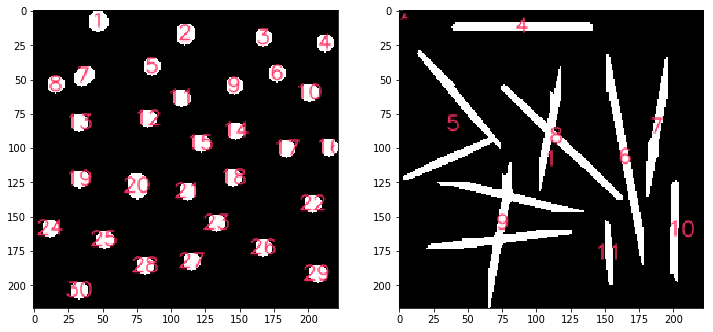

In [66]:
# transforming images into grayscale
gray_circles = cv2.cvtColor(circles,cv2.COLOR_BGR2GRAY)
gray_linesFinal = cv2.cvtColor(linesFinal,cv2.COLOR_BGR2GRAY)
# connected components to count 
NC,LC,SC,CC = cv2.connectedComponentsWithStats(gray_circles,cv2.CV_32S,connectivity = 4)
NL,LL,SL,CL = cv2.connectedComponentsWithStats(gray_linesFinal,cv2.CV_32S, connectivity = 4)
print("number if circles  = ", NC)
print("number of lines = ", NL)
# creating copy to test puttext
Tcircles = circles.copy()
Tlines = linesFinal.copy()
# putting text
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(1,NC):
    cv2.putText(Tcircles,str(i),tuple(list(map(int, [CC[i][0] - (5 if i<10 else 10),CC[i][1] + 5]))), font, .5,(100,50,255),1,cv2.LINE_AA)

for i in range(0,NL):
    cv2.putText(Tlines,str(i+1),tuple(list(map(int, [CL[i][0] - (5 if i<10 else 10),CL[i][1] + 5]))), font, .5,(100,50,255),1,cv2.LINE_AA)

#cv2.putText(Tcircles,'0',tuple(list(map(int, [CC[1][0] - 5,CC[1][1] + 5]))), font, .5,(0,0,255),1,cv2.LINE_AA)
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(Tcircles,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(Tlines,cv2.COLOR_BGR2RGB))
plt.show()

## Task 8

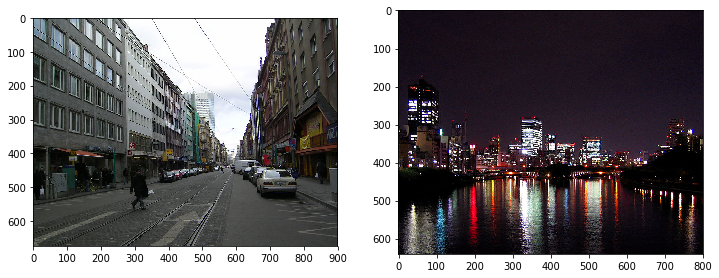

In [75]:
# Reading the new image
morning = cv2.imread('morning.jpg',1)
evening = cv2.imread('evening.jpg',1)
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(morning,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(evening,cv2.COLOR_BGR2RGB))
plt.show()

## Solution 1

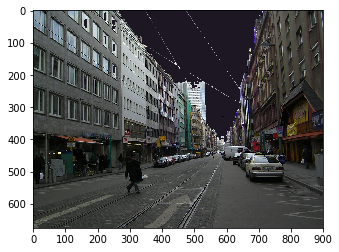

In [123]:
# Binary Threshold
retTest,threshTest = cv2.threshold(morning,200,255,cv2.THRESH_BINARY)
# 5x5 square SE
tse = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# Open to eliminate false thresholds
threshOpen = cv2.morphologyEx(threshTest,cv2.MORPH_OPEN,tse)
# removing all the artifacted colors (blue and cyan)
blue = threshOpen.copy()
blue[np.where((blue == [255,255,0]).all(axis = 2))] = [0,0,0]
blue[np.where((blue == [255,0,0]).all(axis = 2))] = [0,0,0]
# replacing all white in (blue) with the target sky color
blue[np.where((blue == [255,255,255]).all(axis = 2))] = evening[200,200]
# replacing all pixels in the original image who has the same position of the skycolor of the second image with sky color:-
Tmorning = morning.copy()
Tmorning[np.where((blue == evening[200,200]).all(axis = 2))] = evening[200,200]
#imshow()
plt.imshow(cv2.cvtColor(Tmorning,cv2.COLOR_BGR2RGB))
plt.show()

## solution 2

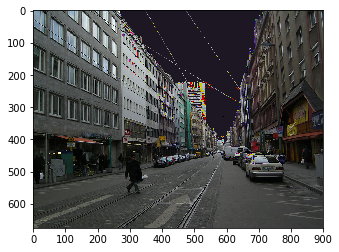

In [6]:

ret,thresh = cv2.threshold(all_coins,220,255,cv2.THRESH_BINARY_INV)#applying To zero inverse threshold only on the (X > 270) part of the image to reduce the error
ret,thresh = cv2.threshold(morning[:,270:],210,255,cv2.THRESH_TOZERO_INV)
#replacing the modified area of the base img with the new one
output = morning.copy()
output[:,270:] = thresh[:,:]
#extracting new color
newColor = evening [200,200]
#replacing all the pixels with value [0,0,0] to the new color (black -> new color)
output[np.where((output == [0,0,0]).all(axis = 2))] = newColor
#imshow
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.show()

## Task 8

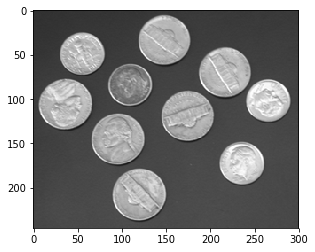

In [99]:
# Reading the new image
all_coins = cv2.imread('coins.png',1)
plt.imshow(cv2.cvtColor(all_coins,cv2.COLOR_BGR2RGB))
plt.show()

In [100]:
def replace_white(image, color):
    for row in image:
        for column in row:
            if column[0] == 255 and column[1] == 255 and column[2] == 255:
                column[0] = color[0]
                column[1] = color[1]
                column[2] = color[2]

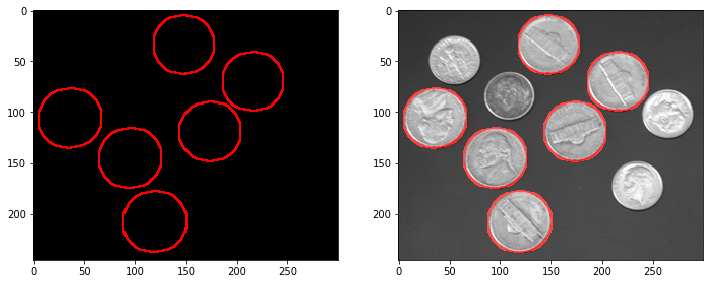

In [101]:
# Getting SE
bigCircleSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
# Eroding
big_coins = cv2.erode(all_coins,bigCircleSE,iterations = 2)
# Applying Threshold
ret, big_coins = cv2.threshold(big_coins,100,255,cv2.THRESH_BINARY)
# Dilating
big_coins = cv2.dilate(big_coins,bigCircleSE,iterations = 2)
# Getting SE
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# Dilating
big_coins_dilated = cv2.dilate(big_coins,squareSE,iterations = 2)
# Detecting Edges
big_coins_stroked = big_coins_dilated - big_coins
# Replace White With Red
replace_white(big_coins_stroked, [0, 0, 255])
# Plotting
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(big_coins_stroked,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(cv2.add(all_coins, big_coins_stroked),cv2.COLOR_BGR2RGB))
plt.show()

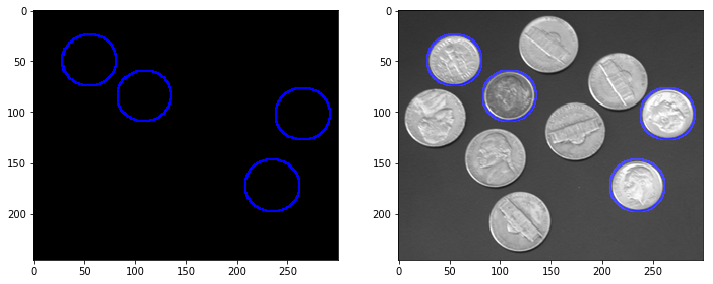

In [102]:
# Filtering Out Big Coing
ret, big_coins_inv = cv2.threshold(big_coins,100,255,cv2.THRESH_BINARY_INV)
small_coins = cv2.bitwise_and(big_coins_inv, all_coins)
# Removing Some Noise
# Getting SE
squareSE = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# Eroding
small_coins = cv2.erode(small_coins,squareSE,iterations = 2)
# Dilating
small_coins = cv2.dilate(small_coins,squareSE,iterations = 2)
# Applying Threshold
ret, small_coins = cv2.threshold(small_coins,80,255,cv2.THRESH_BINARY)
# Dilating
small_coins_dilated = cv2.dilate(small_coins,squareSE,iterations = 2)
# Detecting Edges
small_coins_stroked = small_coins_dilated - small_coins
# Replace White With Blue
replace_white(small_coins_stroked, [255, 0, 0])
# Plotting
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(small_coins_stroked,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(cv2.add(all_coins, small_coins_stroked),cv2.COLOR_BGR2RGB))
plt.show()

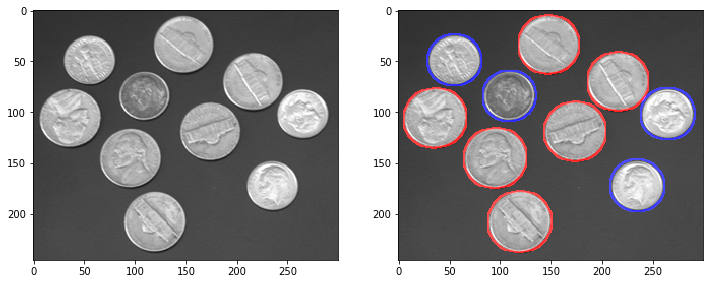

In [103]:
# Plotting
f, plots = plt.subplots(1,2,figsize=(12, 12))
plots[0].imshow(cv2.cvtColor(all_coins,cv2.COLOR_BGR2RGB))
plots[1].imshow(cv2.cvtColor(cv2.add(cv2.add(all_coins, big_coins_stroked), small_coins_stroked),cv2.COLOR_BGR2RGB))
plt.show()

In [104]:
# Cash
ret, _ = cv2.connectedComponents(
    cv2.cvtColor(big_coins_dilated,cv2.COLOR_BGR2GRAY)
)
nBigCoins = ret - 1
ret, _ = cv2.connectedComponents(
    cv2.cvtColor(small_coins_dilated,cv2.COLOR_BGR2GRAY)
)
nSmallCoins = ret - 1
print("|------------------------|-----------------------|")
print("|Item                    |                  Price|")
print("|------------------------|-----------------------|")
print("|BigCoins x ",nBigCoins,"          |                  ",nBigCoins*50,"|")
print("|SmallCoins x ",nSmallCoins,"        |                  ",nSmallCoins*25,"|")
print("|------------------------|-----------------------|")
print("|Total                   |                  ",nBigCoins*50 + nSmallCoins*25,"|")
print("|------------------------|-----------------------|")


|------------------------|-----------------------|
|Item                    |                  Price|
|------------------------|-----------------------|
|BigCoins x  6           |                   300 |
|SmallCoins x  4         |                   100 |
|------------------------|-----------------------|
|Total                   |                   400 |
|------------------------|-----------------------|


## To generalize this algorithm to the second image we had to first turn the image into binary scale with all coins in white and background is black and then doing the steps commented in  the code below ..

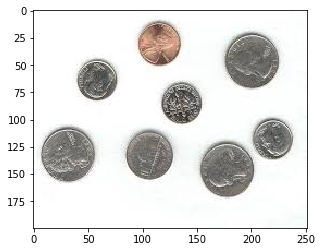

In [94]:
# Reading the new image
all_coins = cv2.imread('coins_color.jpeg',1)
plt.imshow(cv2.cvtColor(all_coins,cv2.COLOR_BGR2RGB))
plt.show()

Total Price =  4 *25 + 4 *50 =  300


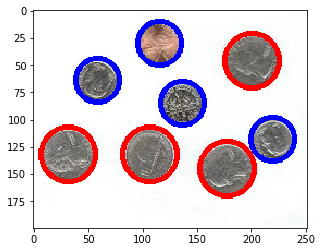

In [95]:
# To binary
ret,thresh = cv2.threshold(all_coins,220,255,cv2.THRESH_BINARY_INV)
# Getting SEs
CSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
BigCSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
SmallCSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
#Closing to clean the noise in the circles (closing not open but i miss-named the variable)
threshOpen = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,CSE)
#cleaning non binary colors
threshOpen[np.where((threshOpen == [255,255,0]).all(axis = 2))] = [255,255,255]
threshOpen[np.where((threshOpen == [255,0,255]).all(axis = 2))] = [255,255,255]
threshOpen[np.where((threshOpen == [0,255,255]).all(axis = 2))] = [255,255,255]
threshOpen[np.where((threshOpen == [255,0,0]).all(axis = 2))] = [255,255,255]
threshOpen[np.where((threshOpen == [0,255,0]).all(axis = 2))] = [255,255,255]
threshOpen[np.where((threshOpen == [0,0,255]).all(axis = 2))] = [255,255,255]
# Converting image to grayscale to pass it to connectedComponents()
threshOpen = cv2.cvtColor(threshOpen,cv2.COLOR_BGR2GRAY)
# opening with big SE to extract big coins
bigs = cv2.morphologyEx(threshOpen,cv2.MORPH_OPEN,BigCSE)
# counting big coins
nbigs,lb,sb,cb = cv2.connectedComponentsWithStats(bigs)
nbigs -= 1
cb = cb[1:]
# drawing circles
for i in range (nbigs):
    cv2.circle(all_coins,tuple(list(map(int, cb[i]))),25,(0,0,255),3)
# small coins = binary image - big coins .. and then count smalls
smalls =cv2.morphologyEx(threshOpen - bigs,cv2.MORPH_OPEN,SmallCSE) 
nsmalls,ls,ss,cs = cv2.connectedComponentsWithStats(smalls)
nsmalls -= 1
cs = cs[1:]
# drawing circles
for i in range (nsmalls):
    cv2.circle(all_coins,tuple(list(map(int, cs[i]))),20,(255,0,0),3)
# Total price 
print ('Total Price = ',nsmalls,'*25 +',nbigs, '*50 = ',nsmalls * 25 + nbigs * 50)
# Imshow ()
plt.imshow(cv2.cvtColor(all_coins,cv2.COLOR_BGR2RGB))
plt.show()


## The background of the 2 images are different ( one is white and the other is gray ), so if we want to make one algorithm for both images we have to first check wether the background is white or gray and then we choose binary threshold or inverse binary threshold for each case.

# Bonus

## Q13
### Assumig that all images are centered ( leaf in center of image ) we can do the following :-
### 1 - craete a score variable which is initially = 0.
### 2- compare each pixel in the test sample with the correspoding one in training sample, if they are the exact color then increase the score by 1 .. if there color is within a certain threshold increase it by .5 if more than the threshold dont increase it.
### 3- normalize the score so that it becomes a number between 0 and 1, the score then indicates how close the training sample is to the test one.

# Q8
## A)
### Skeletonizing can be done to white images with opening but since we have black images we will use closing instead
### As no implementation is needed i will only explain the procedure ..
### first we do a closing to the base image followed by subtracting the closed from the bese image (base - closed)
### then we bitwise or the result with an image which is iniatialized with zeros and the same size of our image and the result we put then in this image ... skel = cv2.bitwise_or(skel,closed) 
### then we count the non zero pixels in the output image if they are euqal to the size of the image then we are done ... if not repeat from first step but for the resulted image (skel) untill you're done.
### i think using cross SE is the best for this purpose
## B) 
### i think center of mass can be calculated by searching for the point on the skeleton which is the intersection with the most number of lines this will likely be the center of mass
## C)
### Area can be calculated by calculating the area of the shape which results from connecting the terminating points of the skeleton .. this will be likely the area of the shape

# Q9
## A)
### I think hit and miss can be used to get the ending point of a skeleton as follows:
### We can search for a point in the skeleton which is connected to exactly one point, this can be done using SE with one zero in the middle and only one zero in a pixel next to the middle one, and the rest of the SE is -1 to ensure that all those points are exactly -1
### we will have different SEs with (one) in a different place indicating the direction of the terminal we are searching for.
### by using hit and miss with those SEs we will find the end points of the skeletons
### same technique can be used for joint points with replacing the SE with another one with (one) in center and 3 (ones) in neighbour pixels to indicate that this is a joint point.